## Linear regression workbook

This workbook will walk you through a linear regression example. It will provide familiarity with Jupyter Notebook and Python.  Please print (to pdf) a completed version of this workbook for submission with HW #1.

ECE C147/C247, Winter Quarter 2024, Prof. J.C. Kao, TAs: T.Monsoor, Y. Liu, S. Rajesh, L. Julakanti, K. Pang

In [84]:
import numpy as np 
import matplotlib.pyplot as plt

#allows matlab plots to be generated in line
%matplotlib inline 

### Data generation

For any example, we first have to generate some appropriate data to use. The following cell generates data according to the model: $y = x - 2x^2 + x^3 + \epsilon$

Text(0, 0.5, '$y$')

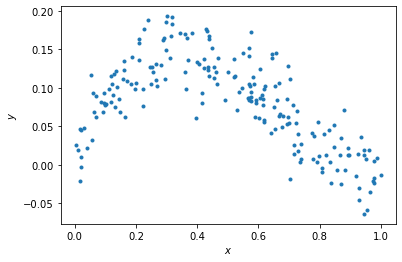

In [85]:
np.random.seed(0)  # Sets the random seed.
num_train = 200     # Number of training data points

# Generate the training data
x = np.random.uniform(low=0, high=1, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

### QUESTIONS:

Write your answers in the markdown cell below this one:

(1) What is the generating distribution of $x$?

(2) What is the distribution of the additive noise $\epsilon$?

### ANSWERS:

(1) x is a random number uniformly distributed on the interval [0, 1). The values of x range from 0 (inclusive) to 1 (exclusive) and each value has an equal probability of being seen as uniformly distributed.
The resulting y is calculated from the values of x, with some normally distributed noise with mean 0 and standard deviation 0.03 added.


(2) The generated noise is normally distributed with a mean of 0 and a standard deviation of 0.03 (also known as a Gaussian distribution).

### Fitting data to the model (5 points)

Here, we'll do linear regression to fit the parameters of a model $y = ax + b$.

In [27]:
from sklearn.linear_model import LinearRegression
# xhat = (x, 1)
xhat = np.vstack((x, np.ones_like(x)))

# ==================== #
# START YOUR CODE HERE #
# ==================== #
# GOAL: create a variable theta; theta is a numpy array whose elements are [a, b]

theta = np.zeros(2) # please modify this line

X = x.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
a = model.coef_[0]  # Slope
b = model.intercept_  # Intercept
theta = np.array([a, b])

# ================== #
# END YOUR CODE HERE #
# ================== #

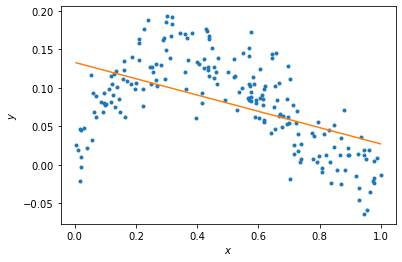

In [28]:
# Plot the data and your model fit.
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression line
xs = np.linspace(min(x), max(x),50)
xs = np.vstack((xs, np.ones_like(xs)))
plt.plot(xs[0,:], theta.dot(xs))

### QUESTIONS

(1) Does the linear model under- or overfit the data?

(2) How to change the model to improve the fitting?

### ANSWERS

(1) under-overfit the data.


(2) If you want to fit y with a linear model, you need to extend the features by expanding the original feature x. Specifically, expand x into polynomial features such as x, x^2, x^3, and so on. These polynomial features are then used as inputs to construct a linear model to fit y.


### Fitting data to the model (5 points)

Here, we'll now do regression to polynomial models of orders 1 to 5.  Note, the order 1 model is the linear model you prior fit.

In [72]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
N = 5
xhats = []
thetas = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable thetas.
# thetas is a list, where theta[i] are the model parameters for the polynomial fit of order i+1.
#   i.e., thetas[0] is equivalent to theta above.
#   i.e., thetas[1] should be a length 3 np.array with the coefficients of the x^2, x, and 1 respectively.
#   ... etc.

thetas.append([model.coef_[0], model.intercept_])
for order in range(1, N):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=order)
    X_poly = poly_features.fit_transform(X)
    
    # Create a new linear regression model
    model_poly = LinearRegression()
    
    # Fit the model to the polynomial features
    model_poly.fit(X_poly, y)
    
    # Get the estimated coefficients
    theta_poly = np.append(model_poly.coef_, model_poly.intercept_)
    
    # Add the theta array to the list
    thetas.append(theta_poly)

    

# ================== #
# END YOUR CODE HERE #
# ================== #

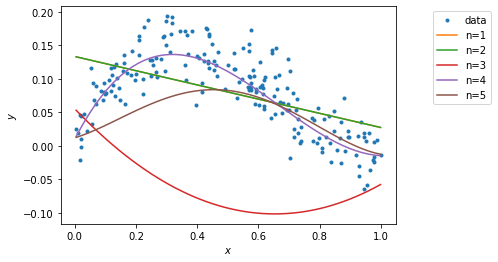

In [74]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []

for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)


for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:],  np.dot(np.array(thetas[i]),plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

### Calculating the training error (5 points)

Here, we'll now calculate the training error of polynomial models of orders 1 to 5.

In [75]:
from sklearn.metrics import mean_squared_error

training_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable training_errors, a list of 5 elements,
# where training_errors[i] are the training loss for the polynomial fit of order i+1.
# Order 1: Linear model (already fitted)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
training_errors.append(mse)
for order in range(2, 6):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=order)
    X_poly = poly_features.fit_transform(X)
    
    # Create a new linear regression model
    model_poly = LinearRegression()
    
    # Fit the model to the polynomial features
    model_poly.fit(X_poly, y)
    
    # Predict the target values
    y_pred_poly = model_poly.predict(X_poly)
    
    # Calculate the mean squared error
    mse_poly = mean_squared_error(y, y_pred_poly)
    
    # Add the training error to the list
    training_errors.append(mse_poly)
    

# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Training errors are: \n', training_errors)

Training errors are: 
 [0.0023799610883627007, 0.001092492220926853, 0.0008169603801105373, 0.000816535373529698, 0.0008161479195525291]


### QUESTIONS

(1) What polynomial has the best training error?

(2) Why is this expected?

### ANSWERS

(1) The 5th order polynomial training error is the best.


(2) Since the amount of data is small and there is an error in the data, if the factorial is too large, the error is reduced, but there is an overfitting problem.


### Generating new samples and testing error (5 points)

Here, we'll now generate new samples and calculate testing error of polynomial models of orders 1 to 5.

Text(0, 0.5, '$y$')

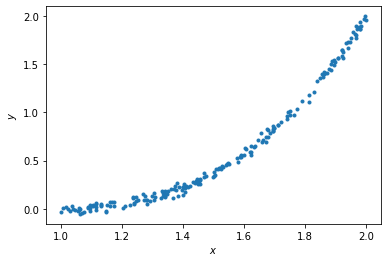

In [76]:
x = np.random.uniform(low=1, high=2, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [77]:
xhats = []
for i in np.arange(N):
    if i == 0:
        xhat = np.vstack((x, np.ones_like(x)))
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        xhat = np.vstack((x**(i+1), xhat))
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))
                              
    xhats.append(xhat)

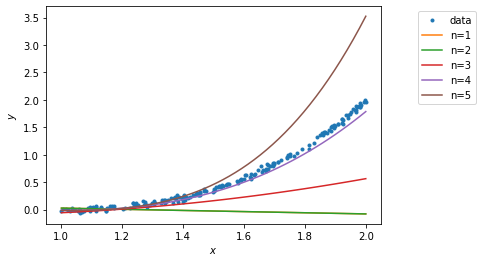

In [83]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], np.dot(thetas[i],plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

In [81]:
testing_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable testing_errors, a list of 5 elements,
# where testing_errors[i] are the testing loss for the polynomial fit of order i+1.
# pass
X = x.reshape(-1, 1)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
training_errors.append(mse)
for order in range(0, N):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=order)
    X_poly = poly_features.fit_transform(X)
    
    # Create a new linear regression model
    model_poly = LinearRegression()
    
    # Fit the model to the polynomial features
    model_poly.fit(X_poly, y)
    
    # Predict the target values
    y_pred_poly = model_poly.predict(X_poly)
    
    # Calculate the mean squared error
    mse_poly = mean_squared_error(y, y_pred_poly)
    
    # Add the training error to the list
    testing_errors.append(mse_poly)
    
    
# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Testing errors are: \n', testing_errors)

Testing errors are: 
 [0.3755032551553172, 0.040027663041497165, 0.0013057361468590306, 0.0009387452442745558, 0.0009306959438728502]


### QUESTIONS

(1) What polynomial has the best testing error?

(2) Why polynomial models of orders 5 does not generalize well?

### ANSWERS

(1) 5 degree polynomials

(2) It's overfitting.